#Goal: Assess whether the number of Units per zip code is a good predictor of citibike trips originating from that zip code.

##Motivation: 
CitiBike must distribute bike hubs efficiently. In order to do so it needs a good predictor of the number of rides originating from a location. It is a reasonable assumption that a lot of riders ride from home to their destination. It is also reasonable to assume that if the bikes are far from one's residence the rider would be discouraged from taking a bike.

##Method: 

1) __Fit__ BOTH a first and second degree linear model  (a line and a parabola) to the number of rides per zip code (this is your dependent variable) as a function of number of Residential Units in that zip code (this is your independent variable). 

2) __Display__ your fits graphically with a plot. Describe your plot with a Caption in cell of the notebook


3) __Compare__ you regression with a 1-degree polynomial to your regression with a 2-degree polynomial and __test__ (with the appropriate statistical test) which is better. 

4) Since points at the edge of the x range have a lot of "leverage" (have a large influence on your test) if you find that there are suspicious points at the limit of the independent variable that could be outliers make cuts that remove those points and redo the fits with the 1- and 2-degree polynomial, and test which is better as you did before with a statistical test

5) __Please state in words your findings__. 
State in words the general quality of your prediction. You do not need to be rigorously stating your level of confidence, but do justify your level of belief in your best regression model, and if it seems a good idea to reduce the x range (remove suspicious outliers). 

6) __Discuss__ if the test could be improved: the number of residential units may be a good predictor under specific circumstances (restricting your dataset by any variable, eg only certain times, days, areas, what do you think?), and if you have time test these other hypothesis (for extra credit). Try and imagine what variable could be a better predictor (and if you have time test other vatiables also for extra credit).

##DATA:

   Rides: use at least 2 months of citibike data separated by more than 1/3 of the year (to mitigate seasonal effects). You can fit the 2 datasets separately or join them. Group the rides by 'start station id' (if you do not have the citibike data on your laptop you can get it here https://www.citibikenyc.com/system-data or any 2015 dataset here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/)
 
   Residential Units: Use the Pluto data. Data for Manhattan is available here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/
   Because of the large size of the Brookly file you are only required to do this with the Manhattan data. As Extra Credit: if at the end you have time repeat the analysis with the Brookly data and see if the results are different.

   Zip codes of citibike stations: I prepared a json file with that info for you here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationzips.json
   
   

Please label your plots, answer all questions, produce whatever outputs and plots help you in the process but try and remove useless outputs from your final version. Clearly state your answers in separate cells, so they are not lost and we can clearly see them. 

Please make an attempt to be PEP8 compliant. We will not be strict with PEP8 but complete disregard of the "simplest most basic PEP8 rules" will be noticed and repeated violations will be accounted for. If you forgot the simplest most basic PEP8 rules are here (). The complete rules here https://www.python.org/dev/peps/pep-0008/ https://code.google.com/p/soc/wiki/PythonStyleGuide 

As usual, there are many ways to do what you are required to do here, and we do not care which way you do it, which packages you use, how you wrangle and clean your data as long as you do all the tasks that are asked, and answer all the questions that are asked, and obtain results that are not incorrect (of course some ways are more elegant than others but elegance will just earn you extra time, if your code is efficient, and an honor badge and a nod from us, not a higher grade in this midterm). 

If you are comfortable with the description above and have a plan in mind and you need no further instructions go ahead and execute your plan! If you do not have a plan yet I recommend you sit down, collect your thoughts, remember what you have learned this year, try to come up with one and start working on it after you developed a roadmap in your head. 

I have solved this problem in a few ways, and identified what may be difficulties you may encounter. Some hints are available at this link (https://docs.google.com/document/d/13x2cPuBFwdlUyhFTtmMlTiaBkt3FSauHjarWfZx_QhE/edit?usp=sharing), and you are free to refer to them. However, I do recommend you go your own way and rely on what you know and wha you have learned and done so far in the PUI homework. 




##The plan
- concatenate citibike data sets from Jan and April 2015 to get the unified dataset, then extract trips (using 'tripduration') and start station id
- read the json data and put it into columns and then join the datasets for trips with the sid by zipcode
- clean data to only have manhattan zipcodes, which start with '100' (example '10001' where I live)

- for residential units by zipcode: create DF that groups residential units by zipcode


In [16]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats 
%pylab inline
import os
import json
import geopandas as gp

Populating the interactive namespace from numpy and matplotlib


In [8]:
dfj=pd.read_csv('/Users/mariaortiz/Desktop/Citibike/201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [7]:
dfa=pd.read_csv('/Users/mariaortiz/Desktop/Citibike/201504-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [14]:
frames = [dfj, dfa]
dfall = pd.concat(frames)
#print dfall.columns
dfall.head(5)

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [80]:
mytrips = dfall[['tripduration', 'start station id']]
mytrips.rename(columns={'start station id': 'sid'}, inplace=True)
mytrips.head()


,tripduration,sid
0,1346,455
1,363,434
2,346,491
3,182,384
4,969,474


In [105]:
bsize = gp.GeoDataFrame.from_file('/Users/mariaortiz/PUI2015/Manhattan/MNMapPLUTO.shp')
#print bsize.columns
unitsbyzip = bsize[['ZipCode','UnitsRes']]
#unitsbyzip.head()
#we are getting somewhere...but I need a DF that aggregates the units by zip...unique zip...
ubz = unitsbyzip['ZipCode'], unitsbyzip['UnitsRes'].sum
ubz.head()

AttributeError: 'tuple' object has no attribute 'head'

Trying to read the json data into a csv so I can join it with the mytrips df that I created above

In [85]:
import urllib2
this_url = 'http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationzips.json#'
response = urllib2.urlopen(this_url)
data = json.load(response)
#sidj = len(data[u]['zip'])
#print data
#the json file print so I know I am reading it right!!
#myzips = pd.DataFrame(data.json['*'])
#myzips.head(5)
 

AttributeError: 'dict' object has no attribute 'json'

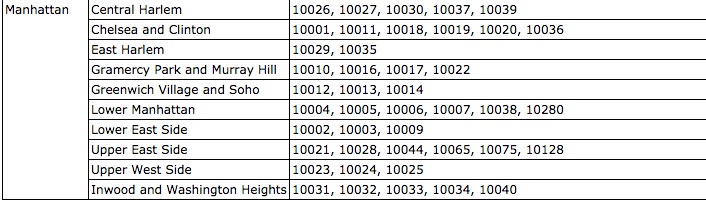

In [108]:
#What do MN zipcodes look like...
from IPython.display import Image
Image(filename='/Users/mariaortiz/PUI2015_mortiz/Midterm/MNzips.png')

In [114]:
myzips=pd.read_csv('/Users/mariaortiz/PUI2015/zipcodes.csv')
myzipst = myzips.transpose()
myzipst.head()
#we need to delete that first line!

,0
sid,zipcode
344,11216
345,10011
346,10014
347,10014


In [113]:
#we need a dictionary to join, with 'sid' and 'zipcode' as keys
zipdict = {}

#we need to get rid of the non manhattan zipcodes...cut values for zipcode that don't start with '100' or '101' or '102'
bins = np.arange(10001, 10281, 10000)
myzipst['MN'] = myzipst["sid"][(myzipst["zipcode"] <= 10280)]


KeyError: 'sid'

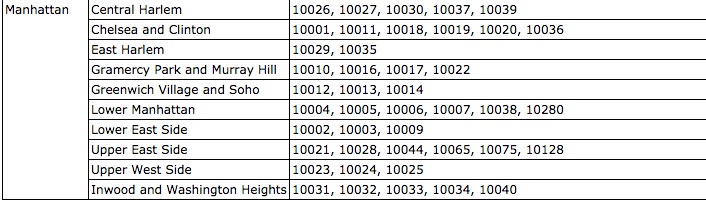

In [89]:
#mytrips= np.zeros(mytrips['sid'].len(462))
#for i, entry in enumerate(mytrips):
   # mytrips = data[entry['sid']]

AttributeError: 'Series' object has no attribute 'len'

In [96]:
sidwzip = pd.merge(mytrips, myzipst, how='inner', on=['sid'])
print sidwzip.columns


KeyError: 'sid'